In [43]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Preprocessing

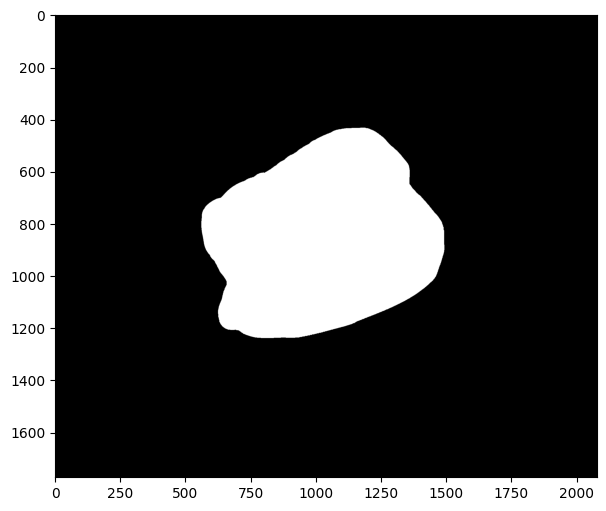

Number of contours detected: 1


In [44]:
IMG = cv.imread('pore1.png', 1)
gray = cv.cvtColor(IMG, cv.COLOR_BGR2GRAY)

# apply thresholding to convert grayscale to binary image
ret,thresh = cv.threshold(gray,100,255,0)
tresh = 255 - thresh

def plot(res):
    plt.figure(figsize=(10,6))
    plt.imshow(res, cmap='grey')
    plt.show()
    
plot(thresh)

# find the contours
contours,hierarchy = cv.findContours(thresh, cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:", len(contours))

# select the first contour
cnt = contours[0]

# Approximate border of pore with ellipse or rectangle
### *Can be used for measuring isometry of the pore*

/var/folders/r_/xvc889350jb1wjh3s9_zfq4m0000gn/T/ipykernel_9367/1742184244.py:7: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


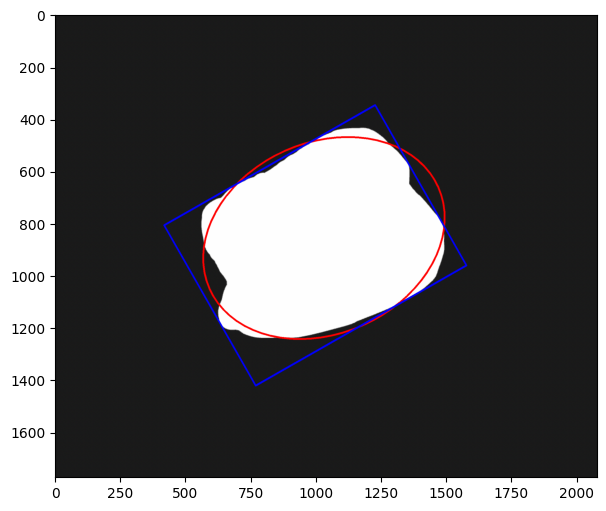

In [45]:
# fit the ellipse to the selected object
ellipse = cv.fitEllipse(cnt)

# find smallest external rectangle
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)


img = IMG.copy()
cv.ellipse(img,ellipse, (255,0,0), 5)
cv.drawContours(img,[box],0,(0,0,255),5)
plot(img)

# Find pairs of the closest and the farest points of the pore
### *Can be used for measuring the average size of the pore*

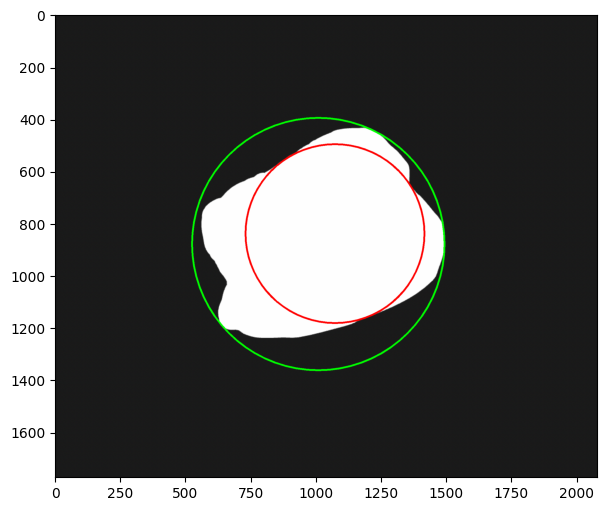

In [67]:
# External Circumference
(x_axis,y_axis),R = cv.minEnclosingCircle(cnt) 
center = (int(x_axis),int(y_axis)) 

# Internal Circumference
dist = cv.distanceTransform(thresh,
                                cv.DIST_L2, 
                                cv.DIST_MASK_PRECISE) # Perform the distance transform 
indices = np.unravel_index(dist.argmax(), dist.shape) # find peak
r = int(dist[indices])


img = IMG.copy()
cv.circle(img,center,int(R),(0,255,0),5) 
cv.circle(img, indices[::-1], r, (255,0,0), 5)
plot(img)